# Module 5: Conservation of Momentum

The exercises in this module range from lecture 25 to lecture 29.

In [1]:
!pip install handcalcs -q
!pip install Pillow -q

In [2]:
import handcalcs.render
from sympy import symbols, Eq, solve
from math import sqrt,pi, cos, sin, radians,asin,atan,degrees, tan, log10
from PIL import Image

Global variables:

In [3]:
%%render param
g=9.81 #m/s2
rho_water=1000 #kg/m3
rho_Hg=13600 #kg/m3
p_atm=101325 #Pa

<IPython.core.display.Latex object>

## Problems for Lectures 25: Conservation of Momentum

---
#### Question 1 (***)[R]

Water flows through a sluice gate as shown below. The friction losses through the gate are estimated to be 0.2 m. Find the horizontal thrust of the water per meter width on the sluice gate. Given: y1 = 2.2 m, y2 = 0.4 m and y3 = 0.5 m. {12.33 kN to the right}

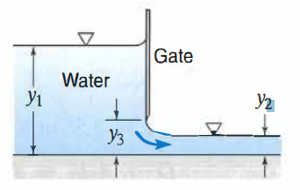

In [28]:
img = Image.open(r"figures/132.png")
img= img.resize((300,190))
img

**Given:**

In [4]:
%%render param 1
h_f=0.2 #m
y_1=2.2 #m
y_2=0.4 #m
y_3=0.5 #m


<IPython.core.display.Latex object>

**Hint**

```{toggle}

Conservation of mass:  

$$
Q_1=Q_2\\
V_1A_1=V_2A_2\\
V_1(y_1*b)=V_2(y_2*b)\\
V_1\frac{y_1}{y_2}=V_2\\
5.5V_1=V_2\\
$$

Conservation of energy:  

$$
z_1+\frac {p_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {p_2}{\rho g}+\frac{V_2^2}{2g}+h_{f}\\
\frac {p_1}{\rho g}= 0, \frac {p_2}{\rho g}=0\\
z_1+\frac{V_1^2}{2g}=z_2+\frac{(5.5V_1)^2}{2g}+h_{f}\\
$$

Solving for $V_1$:

$$
V_1=(\frac{2g(z_1-z_2-h_f}{29.25}))^{0.5}
$$

Conservation of Momentum:  

$$
\sum F_x= \rho Q (V_2x-V_1x)\\
F_1-F_2-R_x=\rho Q (V_2x-V_1x)
$$

```

**Solution**

In [8]:
%%render long 
z_1=y_1 #m
z_2=y_2 #m
V_1= ((2*g*(z_1-z_2-h_f))/(29.25))**0.5 #m/s
V_2= 5.5*V_1 #m/s
b=1 #m
A_1= y_1*b #m2
A_2= y_2*b #m2
Q= V_1*A_1 #m3/s
R_x= rho_water*g*y_1/2*y_1-rho_water*g*y_2/2*y_2-rho_water*Q*(V_2-V_1) #N
R_x_=R_x/1000 #kN

<IPython.core.display.Latex object>

```{toggle}
The force on the structure is the same size but in the opposite direction:
```

In [15]:
%%render 2
F=R_x_ #kN to the right

<IPython.core.display.Latex object>

---
#### Question 2 (***)

Flow occurs over a spillway with a width of 100 m. The spillway has a cross section as shown below. The water depth on the upstream side of the spillway (y<Sub>1</sub>) is 20 m, and on the downstream side (y<Sub>2</sub>) is 1.5 m. The friction energy headloss over the spillway is 1.2 m. Determine the horizontal force of the water on the spillway. {147.7 MN to the right}

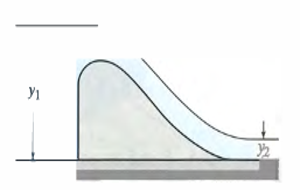

In [27]:
img = Image.open(r"figures/133.png")
img= img.resize((300,190))
img

**Given:**

In [22]:
%%render param 
b= 100#m 
y_1= 20 #m 
y_2= 1.5 #m 
h_f= 1.2 #m 


<IPython.core.display.Latex object>

**Hint**

```{toggle}

The first step is to apply the conservation of mass to establish the relationship between $V_2$ and $V_1$

$$
Q_1=Q_2\\
V_1*A_1=V_2*A_2\\
V_1*y_1*b=V_2*y_2*b\\
V_2= \frac{y_1V1}{y_2}
$$

Replacing the values for this exercise, we have:

$$
V_2= \frac{20V_1}{1.5}\\
V_2= 13.33 V_1
$$

The next step is use the Bernoulli equation and replace the values of pressure to have the depth of the spillway in each section 


$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}+h_{f}\\
\frac {P_1}{\rho g}= y_1 , 
\frac {P_2}{\rho g}=y_2\\
$$

but $z_1=z_2$ because of horizontal floor

$$
\frac{V_1^2}{2g}=y_2+\frac{V_2^2}{2g}+h_{f}-y_1\\
\frac{V_1^2}{2g}=y_2+\frac{(13.33*V_1)^2}{2g}+h_{f}-y_1
$$

Once the velocities at both sections are determined, the conservation of momentum can then be applied:

$$
\sum F_x = \rho Q (V_2-V_1)\\
$$

$$
\rho gh_{c1}A_1-\rho gh_{c2}A_2-F = \rho Q (V_2-V_1)\\
$$

The centroid of the spillway is:

$$
h_c= \frac{y}{2}\\
\rho g\frac {y_1}{2}A_1-\rho g\frac {y_2}{2}A_2-F = \rho Q (V_2-V_1)
$$

```

**Solution**

In [23]:
%%render long 
V_1= (((y_1-y_2-h_f)*2*g)/((y_1/y_2)**2-1))**0.5 #m/s
V_2= y_1*V_1/y_2#m/s
Q= V_1*y_1*b #m3/s
A_1= b*y_1 #m2
A_2= b*y_2 #m2
F= rho_water*g*y_1*A_1/2-rho_water*g*y_2*A_2/2-rho_water*Q*(V_2-V_1) #N
F_kN= F/1000000 #MN

<IPython.core.display.Latex object>

---
#### Question 3 (***)[R]

The inlet water passage shown in the figure below is 3 m wide (normal to the plane of the figure) and narrows down to be 2.5 m wide at the outlet section. Determine the horizontal force acting on the structure. Assume ideal flow. {12.2 m3/s; 11.98 kN to the right}

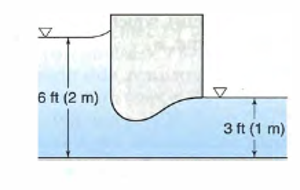

In [26]:
img = Image.open(r"figures/134.png")
img= img.resize((300,190))
img

**Given:**

In [29]:
%%render param 1
b_1= 3 #m
b_2= 2.5 #m
z_1= 2 #m
z_2= 1 #m


<IPython.core.display.Latex object>

**Hint**

```{toggle}

Conservation of energy:  

$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}\\
\frac {P_1}{\rho g}= 0, 
\frac {P_2}{\rho g}=0\\
z_1+\frac{V_1^2}{2g}=z_2+\frac{V_2^2}{2g}\\
$$

Conservation of mass:  

$$
Q_1=Q_2\\
V_1A_1=V_2A_2\\
V_1(y_1*b_1)=V_2(y_2*b_2)\\
V_2=V_1\frac{y_1*b_1}{y_2*b_2}
$$

Using the conservation of mass and energy to solve $V_1$:  

$$
z_1+\frac{V_1^2}{2g}=z_2+\frac{(V_1\frac{y_1*b_1}{y_2*b_2})^2}{2g}\\
$$


Conservation of Momentum:  

$$
\sum F_x= \rho Q (V_2x-V_1x)\\
F_1-F_2-R_x=\rho Q (V_2x-V_1x)
$$
```

**Solution**

In [45]:
%%render long 
y_1=z_1 #m
y_2=z_2 #m


<IPython.core.display.Latex object>

In [48]:
from sympy.solvers import solve
from sympy import Symbol
V_1 = Symbol("V_1")
expr= z_1+V_1**2/(2*g)-z_2-(V_1*(y_1*b_1)/(y_2*b_2))**2/(2*g)
V_1 = solve((expr), (V_1))
V_1=round(V_1[1],2) #m/s

print('Solving for V_1 we have V_1=', V_1, "m/s")

Solving for V_1 we have V_1= 2.03 m/s


In [50]:
%%render long 
V_2= V_1*(y_1*b_1)/(y_2*b_2) #m/s
Q= V_1*(y_1*b_1) #m3/s
A_1= b_1*y_1 #m^2
A_2= b_2*y_2 #m^2
R_x= rho_water*g*y_1/2*A_1-rho_water*g*y_2/2*A_2-rho_water*Q*(V_2-V_1) #N
R_x_= R_x/1000 #kN

<IPython.core.display.Latex object>

```{toggle}
The force on the structure is the same size but in the opposite direction:
```

In [51]:
%%render 2
F=R_x_ #kN to the right

<IPython.core.display.Latex object>

## Problems for Lectures 26 and 27: Conservation of Momentum

---
#### Question 1 (**)[R]

A nozzle is attached to a pipe as shown below. The inside diameter of the pipe is 100 mm, while the water jet exiting from the nozzle has a diameter of 50 mm. The pressure at section 1 is 500 kPa, and the velocity at sections 1 is 6 m/s. Calculate the force of the water on the nozzle. {3.079 kN to the right}

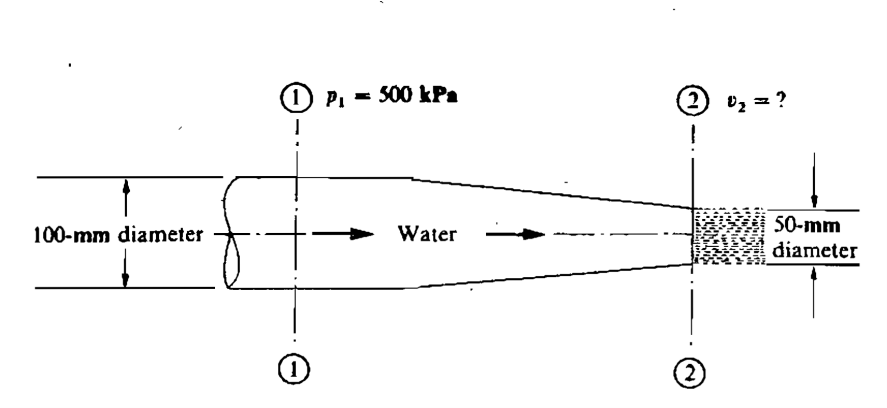

In [24]:
img = Image.open(r"figures/135.png")
img

**Given:**

In [4]:
%%render param 
D_1= 100/1000 #m 
D_2 = 50/1000 #m 
V_1= 6#m/s
P_1= 500*1000 #Pa

<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the force of the water on the nozzle, the momentum equation can be aplied in the x-Direction:

$$
\sum F_x = \rho Q (V_2-V_1)\\
F_{p1}-F_{p2}-R_x=\rho Q (V_2-V_1)\\
$$

Replacing the $F_{p}$ with $PA$ we have:

$$
P_1A_1-P_2A_2-R_x = \rho Q (V_2-V_1)\\
$$

To calculate the flow rate, the conservation of mass can be used 

$$
Q_1=Q_2\\
V_1A_1=V_2A_2
$$
```

**Solution**

In [5]:
%%render long 
A_1= pi*D_1**2/4 #m2
Q= V_1*A_1
A_2= pi*D_2**2/4
V_2= Q/A_2
R_x= P_1*A_1-rho_water*Q*(V_2-V_1) #N
R_x_= R_x/1000 #kN

<IPython.core.display.Latex object>

---
#### Question 2 (**)

The diameters in the figure below are 750 mm and 500 mm. The pressure at point 1 is 650 kPa and the velocity 2.8 m/s. Neglecting friction, find the resultant force on the horizontal conical reducer if water flows:  

a. to the right. {158.3 kN to the right} 

b. to the left. {158.3 kN to the right}  

c. What would happen with the previous answers if we did not neglect friction? {increase Fx in (a) and decrease Fx in (b)}



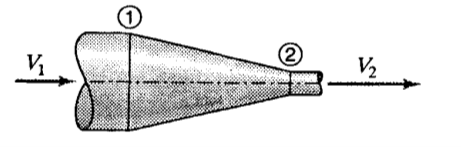

In [774]:
img = Image.open(r"figures/136.png")
img

**Given:**

In [6]:
%%render param 
D_1= 750/1000 #m
D_2= 500/1000 #m
p_1= 650*1000 #Pa
V_1= 2.8 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Conservation of mass:  

$$
Q_1=Q_2\\
V_1A_1=V_2A_2\\
V_2=\frac{V_1A_1}{A_2}
$$  


Conservation of energy:  

$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}\\
z_1= 0, 
z_2=0\\
\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=\frac {P_2}{\rho g}+\frac{V_2^2}{2g}\\
P_2=(\frac {P_1}{\rho g}+\frac{V_1^2}{2g}-\frac{V_2^2}{2g})*\rho g
$$

Conservation of momentum:  

$$
\sum F_x = \rho Q (V_2-V_1)\\
P_1A_1-P_2A_2-R_x = \rho Q (V_2-V_1)\\
$$

```

a)

**Solution**

In [8]:
%%render long
V_2= (V_1*(pi*D_1**2/4))/(pi*D_2**2/4) #m/s
p_2= ((p_1/(rho_water*g))+(V_1**2/(2*g))-(V_2**2/(2*g)))*rho_water*g #Pa
A_1= pi*D_1**2/4 #m2
A_2= pi*D_2**2/4 #m2
Q= V_1*A_1 #m3/s
R_x= p_1*A_1-p_2*A_2-rho_water*Q*(V_2-V_1) #N
R_x_= R_x/1000 #kN

<IPython.core.display.Latex object>

```{toggle}
Force of the water on nozzle is 158.3 kN to the right
```

b)

```{toggle}
Reversing the flow direction gives the identical result, in the same direction as before if no friction is considered.
```

c)

```{toggle}
Assuming the same pressure at the larger section in both cases, as given, friction will reduce $F_2$ and therefore increase $R_x$ in case (a) and do the opposite in case (b).
```

---
#### Question 3 (***)

A perforated plate with 50% of its area consisting of small holes is installed at the outlet of a 30 cm diameter horizontal water pipe carrying water at a velocity of 2 m/s. Neglect energy losses and calculate the force of the water on the perforated plate. Assume that the pressure head in the pipe is much greater than it’s diameter, so that you can use a uniform pressure distribution for any pipe cross section. {142 N to the right}

**Given:**

In [8]:
%%render param 
V_1= 2#m/s
D_1= 30/100 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The first step is calculate the velocity in section 2 by using the conservation of mass: 

$$
Q_1=Q_2\\
V_1*A_1=V_2*A_2\\
$$

where $A_2 = 0.5*A_1$ according the question.  

$$
V_1*A_1=V_2*0.5*A_1\\
V_2=\frac {V_2}{0.5}
$$

Once the velocity is calculated, the pressure in section one can be calculated with the Bernoulli equation:

$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}\\
$$

where $z_1= z_2$, and $P_2= 0 Pa$

$$
\frac {P_1}{\rho g}=\frac{V_2^2}{2g}-\frac{V_1^2}{2g}
$$

Once the pressure in section one is calculated, the force of the water can be calculated with the conservation of Momentum:

$$
\sum F_x = \rho Q (V_2-V_1)\\
P_1A_1-P_2A_2-R_x = \rho Q (V_2-V_1)\\
$$

where $P_2$ is atmospheric pressure= 0 

$$
R_x = -\rho Q (V_2-V_1)+P_1A_1\\
$$
```

**Solution**

In [9]:
%%render long 
V_2 = V_1/0.5 #m/s
A_1= pi*D_1**2/4
Q= V_1*A_1  #m3/s
P_1= (V_2**2/(2*g)-V_1**2/(2*g))*g*rho_water #Pa
R_x= P_1*A_1-rho_water*Q*(V_2-V_1) #N

<IPython.core.display.Latex object>

```{toggle}
The force on the plate is 141.4 N to the right
```

---
#### Question 4 (***)[R]

A reducing right-angled bend lies in the horizontal plane. Water enters from the west at a velocity of 3 m/s and a pressure of 50 kPa, and leaves toward the north. The diameter of the entrance is 500 mm and at the exit 250 mm. Neglecting friction losses, find the magnitude of the x and y components of the resultant force on the bend. {11.6 kN; 6.2 kN}

**Given:**

In [6]:
%%render param 
V_1= 3 #m/s
p_1= 50*1000 #Pa
D_1= 500/1000 #m
D_2= 250/1000 #m

<IPython.core.display.Latex object>

**Hint**

```{toggle}
Conservation of energy:  

$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}\\
z_1= 0, 
z_2=0\\
\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=\frac {P_2}{\rho g}+\frac{V_2^2}{2g}\\
P_2=(\frac {P_1}{\rho g}+\frac{V_1^2}{2g}-\frac{V_2^2}{2g})*\rho g
$$

Conservation of momentum in x:  

$$
\sum F_x = \rho Q (V_2-V_1)\\
P_1A_1-R_x = \rho Q (V_2-V_1)\\
$$

$$
V_2=0
$$

Conservation of momentum in y:  

$$
\sum F_y = \rho Q (V_2-V_1)\\
R_y-P_2A_2 = \rho Q (V_2-V_1)\\
$$

$$
V_1=0
$$
```

**Solution**

In [8]:
%%render long
A_1= pi*D_1**2/4 #m2
A_2= pi*D_2**2/4 #m2
Q= V_1*A_1 #m3/s
V_2= Q/A_2 #m/s
p_2= ((p_1/(rho_water*g))+(V_1**2/(2*g))-(V_2**2/(2*g)))*rho_water*g #Pa
F_x= p_1*A_1-rho_water*Q*(0-V_1) #N
F_y= rho_water*Q*(V_2-0)+p_2*A_2 #N

<IPython.core.display.Latex object>

```{toggle}
The force in x is 11.584 kN to the left and the force in y is 6.2 kN down.
```

---
#### Question 5 (***)[R]

The figure below shows a pipe that ends in a set of two nozzles (points 2 and 3) at right angles to each other, and exiting into the atmosphere. The nozzles are in the horizontal plane. The pipe has a diameter of 150 mm and nozzles 2 and 3 have exit diameters of 100 and 50 mm respectively. The exit velocity at both points 2 and 3 is 10 m/s. Assume ideal flow.

Calculate the following:

a)	The flow rate and velocity at at point 1.  {5.55 m/s}

b)	The pressure at point 1. {34.57 kPa}

c)	The size and direction of the force that the fluid exerts on the pipe. {420 N at 27.9° above East}

d)	Assume the pressure at point 1 remains as in (b), but an energy headloss of 0.5 m occurs through each of the nozzles at points 2 and 3. Calculate the flow rate in the system and the velocities at points 1 and 2. Ignore energy losses other that those at the nozzles and assume the distribution of the flow between 2 and 3 remains the same as in (a). {91 L/s; 5.15 m/s; 9.3 m/s}


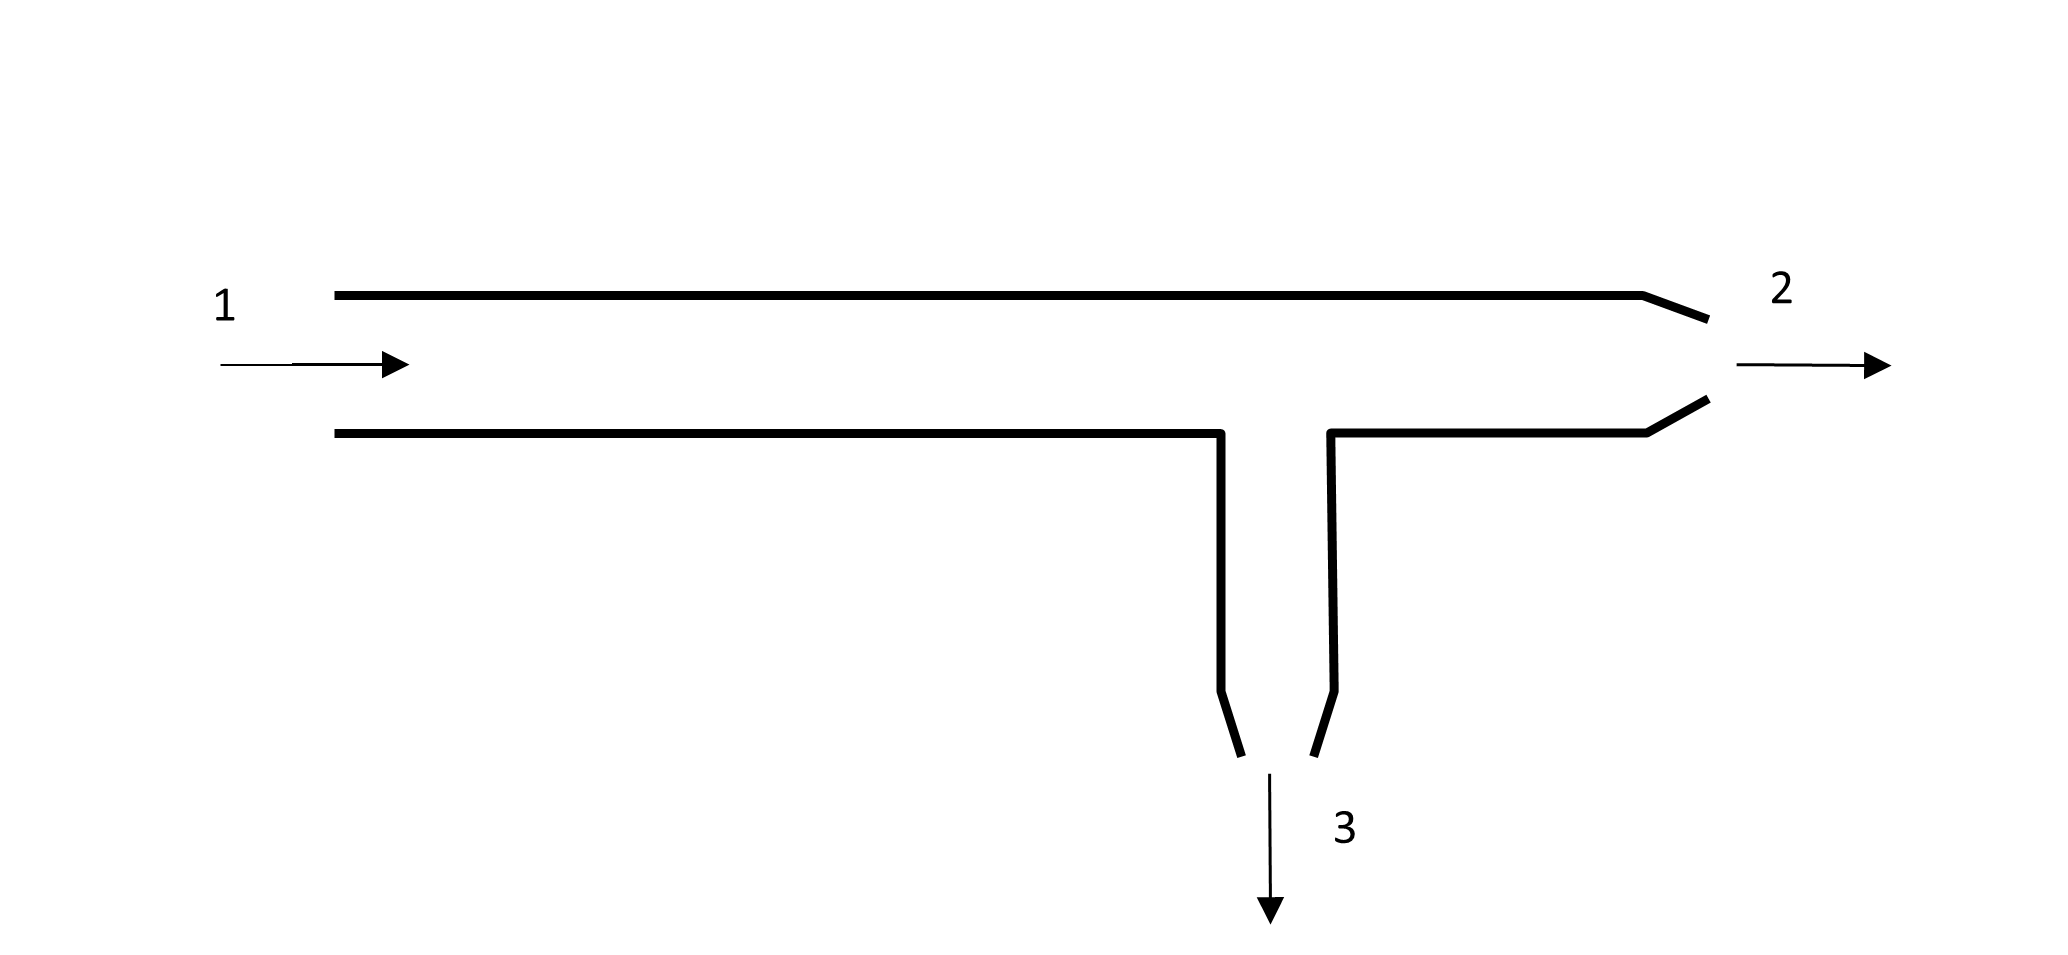

In [786]:
img = Image.open(r"figures/139.png")
img

**Given:**

In [16]:
%%render param 
D_1= 150/1000 #m 
D_2= 100/1000 #m
D_3= 50/1000 #m 
V_2= 10#m/s
V_3= 10#m/s

<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
To calculate the flow rate and velocity in point 1 the conservation of mass can be used:

$$
Q_1=Q_2+Q_3
$$

$$
V_1A_1=V_2A_2+V_3A_3
$$
```

**Solution**

In [17]:
%%render long 3
A_2= pi*D_2**2/4 #m2
A_3= pi*D_3**2/4#m2
A_1= pi*D_1**2/4 #m2
Q_2= V_2*A_2 #m3/s
Q_3= V_3*A_3 #m3/s
Q_1= Q_2+Q_3 #m3/s
V_1= Q_1/A_1 #m/s

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
Using conservation of energy:

$$
z_1+\frac {p_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {p_2}{\rho g}+\frac{V_2^2}{2g}\\
$$

$z_1=z_2$ because is horizontal and $p_2=0 Pa$ because of atmospheric pressure 

Considering the assumptions, the pressure in point 1 is:

$$
\frac {p_1}{\rho g}=\frac{V_2^2}{2g}-\frac{V_1^2}{2g}\\
$$
```

**Solution**

In [18]:
%%render long 2
p_1= ((V_2**2-V_1**2)/(2*g))*rho_water*g #Pa
p_1_= p_1/1000 #kPa

<IPython.core.display.Latex object>

c)


**Hint**

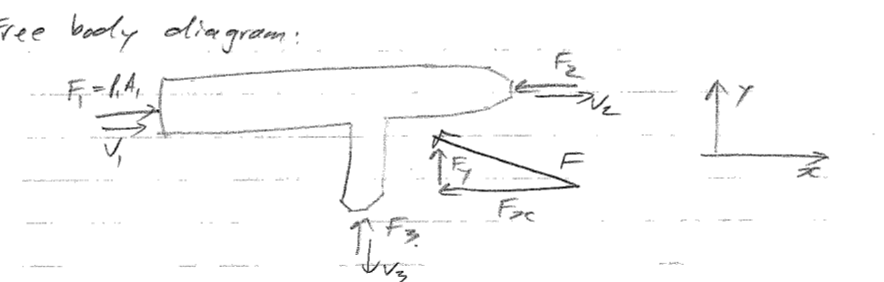

In [55]:
img = Image.open(r"figures/139s.png")
img

```{toggle}
Momentum in x:

$$
\sum F_x= \rho Q(V_{out_x}-V_{in_x})\\
\sum F_x= \rho Q(V_2-V_1)\\
P_1A_1-F_x= \rho Q(V_2-V_1)\\
P_1A_1-F_x= \rho Q_2V_2-\rho Q_1V_1)\\
$$

Momentum in y. It is important to include the velocity sign in this equation; in this example $V_{3y}$ is negative. 

$$
\sum F_y= \rho Q(V_{out_y}-V_{in_y})\\
\sum F_y= \rho Q(-V_3-0)\\
F_3+F_y= \rho Q_3*(-V_3)-0)\\
$$

Once the $F_x$ and $F_y$ are calculated, the force can be determine as:

$$
F= \sqrt{F_x^2+F_y^2}
$$

and the direction of the force can be calculated as:

$$
\theta= arctan (\frac{F_y}{F_x})
$$
```

**Solution**

In [19]:
%%render long 2
F_x= p_1*A_1-rho_water*Q_2*V_2+rho_water*Q_1*V_1 #N
F_y= rho_water*Q_3*-V_3#N
F= sqrt(F_x**2+F_y**2) #N
theta= degrees(atan(abs(F_y)/F_x))

<IPython.core.display.Latex object>

d)

```{toggle}
Using conservation of energy:

$$
z_1+\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=z_2+\frac {P_2}{\rho g}+\frac{V_2^2}{2g}+h_f\\
$$

$z_1=z_2$ because is horizontal and $P_2=0 Pa$ because of atmospheric pressure 

Assuming the distribution of the flow between 2 and 3 remains the same as in (a), it is necessary to calculate the distribution 

$$
Q_2= \frac {0.0789}{0.0981}\\
$$

$$
Q_2=0.80*Q_1\\
$$

$$
Q_3=0.2*Q_1\\
$$

$$
V_2A_2=0.80V_1A_1\\
$$

Using conservation of mass:  

$$
V_2*\frac{\pi D_2^2}{4}=0.80*V_1\frac{\pi D_1^2}{4}\\
$$

$$
V_2*D_2^2=0.80*V_1*D_1^2\\
$$

$$
V_2*(0.1)^2=0.80*V_1*(0.15)^2\\
$$

$$
V_2= 1.8* V_1
$$

Using conservation of energy and mass with an energy headloss of 0.5 m, we have:

$$
\frac {P_1}{\rho g}+\frac{V_1^2}{2g}=\frac{(1.8*V_1)^2}{2g}+h_f\\
$$
```

**Solution**

In [21]:
%%render long 2
h_f=0.5 #m
ratio_Q= Q_2/Q_1
ratio_V= ratio_Q*D_1**2/D_2**2
V_1= sqrt(((p_1/(rho_water*g)-h_f)*2*g)/(ratio_V**2-1))#m/s
V_2= ratio_V*V_1#m/s
Q= (V_1*A_1)*1000 #L/s

<IPython.core.display.Latex object>

---
#### Question 6 (**)

A 40 mm diameter jet has a velocity of 25 m/s. If this jet were to strike a large flat plat normally, what would the resultant force on the plate be? (Tip: the jet direction will be parallel to the plate after hitting it) {785 N}

**Given:**

In [9]:
%%render long 
D_1= 40/1000 #m
V_1= 25 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The force exerted by the water on the flat can be calculated with the momentum equation as:

$$
\sum F_x = \rho Q (V_1-V_2cos \Theta)
$$

where:

$$
cos \Theta=cos(90°)=0
$$


```

**Solution**

In [12]:
%%render long
A_1= pi*D_1**2/4 #m2
R_x= rho_water*A_1*V_1*(V_1-0) #N


<IPython.core.display.Latex object>

---
#### Question 7 (***)

Water hits the curved plate shown below that entirely reverses the flow direction. The diameter of the jet is 50 mm and it hits the plate at a velocity of 12 m/s. The water leaves the plate at the same velocity, but in the opposite direction. Find the force exerted by the water on the vane. {565 N to the right}

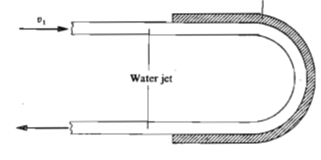

In [60]:
from PIL import Image
img = Image.open(r"figures\141.png")
img

**Given:**

In [61]:
%%render long 
D= 50/1000 #m 
V= 12 #m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}
The force exerted by the water on the vane can be calculated with the momentum equation as:


$$
\sum F_x= \rho Q(V_{out_x}-V_{in_x})\\
\sum F_x= \rho Q(V_2-V_1)\\
P_1A_1+P_2A_2-F_x= \rho Q(V_2-V_1)\\
$$

The assumptions for this exerise are:

$$
P_1= 0 Pa\\
P_2= 0 Pa\\
$$

Next, the conservation of mass should be examined to understand why the velocities are equal 

$$
Q_1=Q_2\\
V_1*A_1=V_2*A_2\\
$$

Since the areas are identical, the velocities in sections 1 and 2 are equal. For momentum conservation, it is important to include the sign of the velocity in section 2, which in this case is negative

$$
-F_x= \rho Q(-V-V)\\
$$
```

**Solution**

In [63]:
%%render long 3
A= pi*D**2/4 #m2
Q= V*A #m3/s
R_x= -rho_water*Q*(-V-V) #N

<IPython.core.display.Latex object>

```{toggle}
The force of the water on vane is 565 N to the right
```

---
#### Question 8 (***)[R]

A jet is bent through an angle θ = 120° by a blade in the horizontal plane as shown below. The water jet has a velocity of 25 m/s and a diameter of 20 mm. Calculate the size and direction of the force on the blade. {340 N at 30° above the horizon}


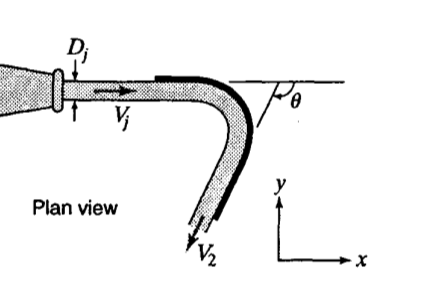

In [19]:
from PIL import Image
img = Image.open(r"figures\142.png")
img

**Given**: 

In [27]:
%%render param 
theta= 120 #°
V=25 #m/s
D=20/1000 #m


<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the size and direction of the force on the blade we need to calculate the force on the x and y axes. We can do this using the momentum equation:

In the x-axis:

$$
\sum F_x= \rho Q(V_{2_x}-V_{1_x})\\
-R_x= \rho Q(V_{2_x}-V_{1_x})\\
$$

In this example, the velocity component along the x-axis can be determined as follows

$$V_{2x}= V_2*cos (180-\theta) m/s$$
$$V_{1x}= 25 m/s \text{ (this is given)}$$


In the conservation of momentum, it is important to include the sign that indicates the direction of the velocity component. Therefore, in this exercise, the $V_{2x}$ component is negative

$$
-R_x= \rho Q(-V_{2x}-V_{1x})
$$

In the y-axis:

$$
\sum F_y= \rho Q(V_{2_y}-V_{1_y})\\
-R_y= \rho Q(V_{2_y}-V_{1_y})\\
$$

In this example, the velocity component along the y-axis can be determined as follows

$$
V_{2x}= V_2*sin (180-\theta) m/s\\
V_{1x}= 0 m/s \text{( since $V_1$ is horizontal)}
$$

Conidering the direction of the velocities, we have:

$$
-R_y= \rho Q(-V_{2y}-V_{1y})
$$

Then, the size of the force can be calculated with the following equation:  

$$
F = \sqrt{(R_x)^2 + (R_y)^2}
$$

and the angle can be calculated as follows:  

$$
\Theta=\frac{R_y}{R_x}
$$
```

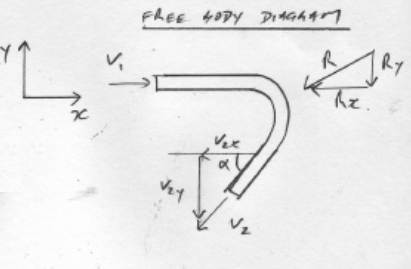

In [23]:
img = Image.open(r"figures\142s.png")
img

**Solution**

In [28]:
%%render long 4
A= pi*D**2/4 #m2
Q= V*A #m3/s

alpha= 180-theta #°

R_x= -rho_water*Q*(-V*cos(radians(alpha))-V)#N
R_y= -rho_water*Q*(-V*sin(radians(alpha))-0)#N

F= sqrt(R_x**2+R_y**2) #N

theta_F= degrees(atan(R_y/R_x)) #°

<IPython.core.display.Latex object>

---
#### Question 9 (***)[R]

A jet of water with a velocity of 25 m/s and diameter of 40 mm strikes a blade in a horizontal plane. If the angle of deflection is 115° and friction reduces the velocity to 22 m/s, find;

a.	the component of the force acting on the blade in the direction of the jet. {1.077 kN to the right}  
b.	the component of the force normal/ perpendicular to the jet. {0.626 kN downwards}  
c.	the magnitude and direction of the resultant force exerted on the blade. {1.246 kN at 30.2° below east}  


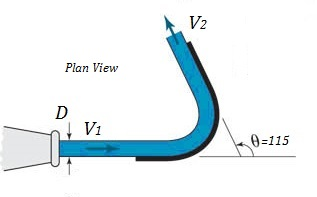

In [64]:
from PIL import Image
img = Image.open(r"figures\143.png")
img

**Given**: 

In [65]:
%%render param 
V_1= 25 #m/s
D= 40/1000 #m
theta= 115 #°
theta_rad= radians(180-theta) #rad
V_2= 22 #m/s


<IPython.core.display.Latex object>

a)

**Hint**

```{toggle}
The force on the X-axis can be calculated with the momentum equation as:

$$
\sum F_x= \rho Q(V_{out_x}-V_{in_x})\\
-R_x= \rho Q(V_{out_x}-V_{in_x})\\
$$

In this example, the velocity component along the X-axis can be determined as follows

$$
V_{2x}= V_2*cos (180-\theta)
$$

In the conservation of momentum, it is important to include the sign that indicates the direction of the velocity component. Therefore, in this exercise, the $V_{2x}$ component is negative

$$
-R_x= \rho Q(-V_{2x}-V_{1x})
$$
```

**Solution**

In [66]:
%%render long 3
A_1= pi*D**2/4 #m2
Q= V_1*A_1 #m3/s
R_x= -rho_water*Q*(-V_2*cos(theta_rad)-V_1) #N

<IPython.core.display.Latex object>

b)

**Hint**

```{toggle}
The force on the Y-axis can be calculated with the momentum equation as:

$$
\sum F_y= \rho Q(V_{out_y}-V_{in_y})\\
R_y= \rho Q(V_{out_y}-V_{in_y})\\
$$

In this example, the velocity component along the X-axis can be determined as follows

$$
V_{2y}= V_2*sin (180-\theta)
$$


$$
R_y= \rho Q(V_{2y}-V_{1y})
$$

In this example, there is no component of the velocitu one in the Y-axis 
```

**Solution**

In [67]:
%%render long 2
R_y= rho_water*Q*(V_2*sin(theta_rad)-0)

<IPython.core.display.Latex object>

c)

**Hint**

```{toggle}
Once the $R_x$ and $R_y$ are calculated, the force can be determine as:

$$
F= \sqrt{R_x^2+R_y^2}
$$

and the direction of the force can be calculated as:

$$
\theta= arctan (\frac{R_y}{R_x})
$$
```

**Solution**

In [68]:
%%render long 2
F= sqrt (R_x**2+R_y**2) #N
theta_F= degrees(atan(R_y/R_x)) #°

<IPython.core.display.Latex object>

---
#### Question 10 (***)

The figure below represents ideal flow in a horizontal plane. The jet (v = 12 m/s, D = 150 mm) is divided by the splitter so that one third of the water is diverted to A. Calculate the magnitude and direction of the resultant force on the blade if the blade is moving to the right at 5 m/s. {763.65 N at 19.11° below the horizontal.

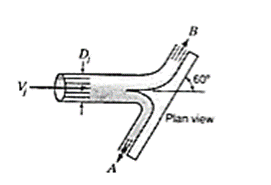

In [24]:
img = Image.open(r"figures\144.png")
img

**Given**: 

In [25]:
%%render param 
V_1=12 #m/s
D_1=150/1000 #m
fraction_A=1/3
V= 5 #m/s
theta=60#°

<IPython.core.display.Latex object>

**Hint**

```{toggle}
First, the exercise provides $V_1$. However, since the system moves in the opposite direction with velocity $V$, we can calculate the relative velocity 1 ($u_1$) by subtracting the two velocities:

$$
v_1=V_1-V
$$  

Then, we need to calculate the flow rate in A and B with the given fraction:  

$$
Q_A=Q*fraction_A\\
Q_B=Q*(1-fraction_A)
$$  

To calculate the magnitud and direction of the resultant force on the blade we need to calculate the force on the x and y axes. We can do this using the momentum equation. Remember to include the sign in the velocities to indicate the direction:

In the x-axis:

$$
-R_x= \rho Q_A(-V_{2Ax}-V_{1Ax})+\rho Q_B(V_{2Bx}-V_{1Bx})\\
$$

In this example, the velocity component along the x-axis can be determined as follows

$$V_{2Ax}=V_{2Bx}= v_1*cos (\theta) m/s$$
$$V_{1Ax}=V_{1Bx} v_1 m/s$$

In the y-axis:

$$
R_y= \rho Q_A(-V_{2Ay}-V_{1Ay})+\rho Q_B(V_{2By}-V_{1By})\\
$$

In this example, the velocity component along the y-axis can be determined as follows

$$V_{2Ay}=V_{2By}= v_1*sin (\theta) m/s$$
$$V_{1Ay}=V_{1By} 0 m/s$$


Finally, the size of the force can be calculated with the following equation:  

$$
R = \sqrt{(R_x)^2 + (R_y)^2}
$$

and the angle can be calculated as follows:  

$$
\Theta=\frac{R_y}{R_x}
$$
```

**Solution**

In [30]:
%%render long 2
A_1= pi*D_1**2/4 #m2
v_1= V_1-V #m/s
Q= A_1*v_1 #m3/s
Q_A= Q*fraction_A #m3/s
Q_B= Q*(1-fraction_A) #m3/s
R_x= -rho_water*Q_A*(-v_1*cos(radians(theta))-v_1)-rho_water*Q_B*(v_1*cos(radians(theta))-v_1) #N
R_y= rho_water*Q_A*(-v_1*sin(radians(theta))-0)+rho_water*Q_B*(v_1*sin(radians(theta))-0) #N
R= sqrt(R_x**2+R_y**2) #N
theta_F= degrees(atan(R_y/R_x)) #°

<IPython.core.display.Latex object>

## Problems	for	Lecture	29: Transients	– Elastic	fluid	in	a	rigid	pipe

---
#### Question 1 (**)[R]

A 2 km long, 500 mm diameter pipeline carries water at a velocity of 2 m/s.  Calculate the pressure rise in the system if water assuming a rigid pipe and a water temperature of 15 °Celsius. {298 m}

**Given**: 

In [69]:
%%render param 
D= 500#mm 
L= 2 #km 
V= 2 #m/s


<IPython.core.display.Latex object>

**Hint**

```{toggle}

To calculate the pressure rise in the system the water hammer equation can be used. 

$$
c= \sqrt {E_v}{\rho_{water}}\\
\Delta p= \rho c V\\
H= \frac {\Delta p}{\rho_{water} g}
$$

The bulk modulus of elasticity can be found in Table A.1 for 15°C $E_v= 2.14 x10^6 kN/m^2$ 
```

**Solution**

In [70]:
%%render long 2
E_v=2.14*10**9 #N/m2
c= sqrt (E_v/(rho_water)) #m/s
Delta_P= rho_water*c*V #Pa 
H= Delta_P/ (rho_water*g) #m

<IPython.core.display.Latex object>

---
#### Question 2 (**)

Calculate the celerity of a pressure wave in water at 20 °C assuming a water density of 1000 kg/m3 . What difference does it make to your answer if change in water density with temperature is taken into account? {1476.48 m/s; 1477.81 m/s, thus less than 0.1% difference}

**Given**: 

In [16]:
%%render param 
T=20 #°C
rho=1000 #kg/m3

<IPython.core.display.Latex object>

**Hint**

```{toggle}
To calculate the celerity the hammer equation can be used. 

$$
c= \sqrt {\frac{E_v}{\rho}}
$$

From Table A.1, the density of water at 20 °C is $998.2 kg/m^3$  
From Table A.4, $E_v= 1030 x10^6 N/m^2$

The effect of the density can be calculated with the difference between the celerities:  

$$
\text{difference} = \left( \frac{c_2 - c_1}{c_2} \right)  100
$$

```

**Solution**

In [18]:
%%render long 2
rho_20=998.2 #kg/m3
E_v=2.18*10**6*1000 #N/m2
c_1= sqrt(E_v/rho) #m/s
c_2= sqrt(E_v/rho_20) #m/s
difference= ((c_2-c_1)/c_2)*100 #%

<IPython.core.display.Latex object>

---
#### Question 3 (**)[R]

Find the celerity of a pressure wave in benzene if a rigid pipe is assumed. If the initial flow velocity is 2 m/s, what will the increased pressure and pressure head be if a valve in the pipe is suddenly closed? {1081.88 m/s; 1.9 MPa; 220.57 m benzene}

**Given**: 

In [15]:
%%render param
V = 2#m/s

<IPython.core.display.Latex object>

**Hint**

```{toggle}

To calculate the pressure rise in the system the water hammer equation can be used. 

$$
c= \sqrt {E_v}{\rho_{water}}\\
\Delta p= \rho c V\\
$$

After calculating the pressure increase, the next step is to determine the pressure head

$$
H= \frac {\Delta p}{\rho_{water} g}
$$

In Table A.4 for benzene S= 0.88 and $E_v= 1030 x10^6 N/m^2$ 
```

**Solution**

In [41]:
%%render long 2
S=0.88 
rho_benz= S*rho_water #kg/m3
E_v=1030*10**6 #N/m2
c= sqrt (E_v/(S*rho_water)) #m/s
Delta_P= rho_benz*c*V #Pa 
Delta_P_Mpa= Delta_P/1000000 #MPa
H= Delta_P/ (rho_benz*g) #m

<IPython.core.display.Latex object>